# 0. column 정보

Column_name Description

1 title : 영화의 제목

2 distributor : 배급사

3 genre : 장르

4 release_time : 개봉일

5 time : 상영시간(분)

6 screening_rat : 상영등급

7 director : 감독이름

8 dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)

9 dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)

10 num_staff : 스텝수

11 num_actor : 주연배우수

12 box_off_num : 관객수


# [ idea ]

[ 01 ]

- 삭제할 COLUMN :  title, dir_prev_bfnum, dir_prev_num, num_staff, num_actor, director
- 데이터 정제

-------------------------
    배급사 -> 배급회수별로 Grouping해서 대기업, 중견, 중소 등으로 나눠보기
    
    genre -> 숫자로 범주

    release_time -> 연도, 월, 일자(~10, ~20 , ~) 로 범주화해보기

    time -> 세개로 분류해보기 ( 상영시간이 너무 짧은 것, 보통, 너무 긴 것 )

    상영등급 -> (청소년, ~, ~ )

In [58]:
import pandas as pd
df = pd.read_csv('./data/movies_train.csv')

# 탐색적 데이터 분석 및 정제

## 기본 통계량 확인

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
title             600 non-null object
distributor       600 non-null object
genre             600 non-null object
release_time      600 non-null object
time              600 non-null int64
screening_rat     600 non-null object
director          600 non-null object
dir_prev_bfnum    270 non-null float64
dir_prev_num      600 non-null int64
num_staff         600 non-null int64
num_actor         600 non-null int64
box_off_num       600 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [3]:
# null 값
# 관객 수 값이 null일 때, 이전 출간 영화 개수 또한 0이다.
df.loc[df['dir_prev_bfnum'].isnull()]['dir_prev_num'].unique()

array([0], dtype=int64)

## 상관관계 확인

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns    

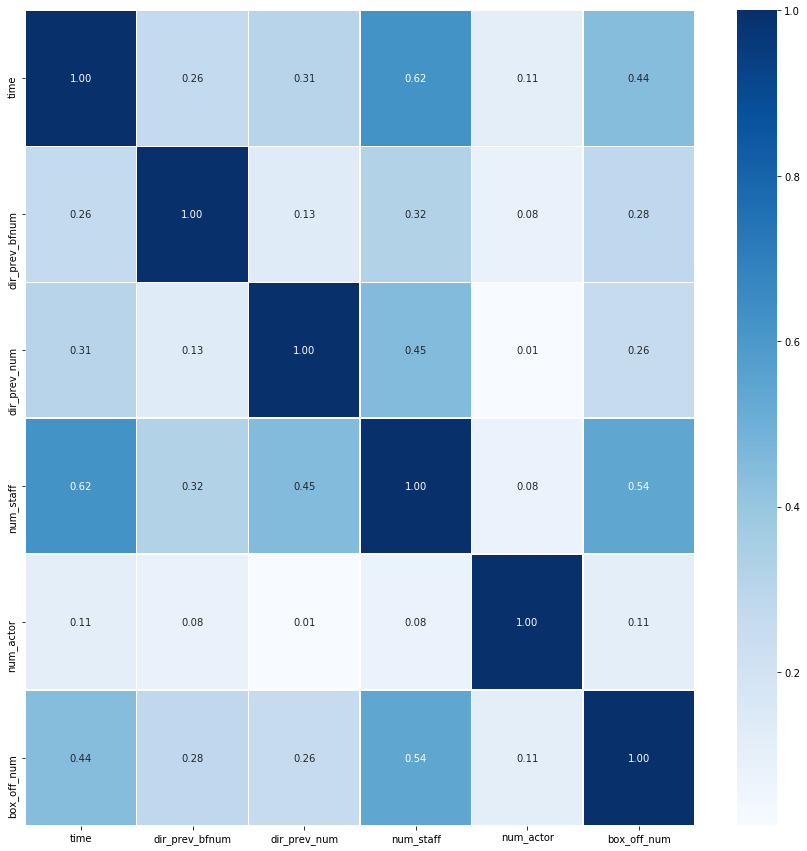

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## column drop

In [16]:
# drop 해보자
# title, dir_prev_bfnum, dir_prev_num, num_staff, num_actor
del df['title']
del df['dir_prev_bfnum']
del df['dir_prev_num']
del df['num_staff']
del df['num_actor']
del df['director']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
distributor      600 non-null object
genre            600 non-null object
release_time     600 non-null object
time             600 non-null int64
screening_rat    600 non-null object
box_off_num      600 non-null int64
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [18]:
df

,distributor,genre,release_time,time,screening_rat,box_off_num
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,23398
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,7072501
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,6959083
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,217866
4,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,483387
...,...,...,...,...,...,...
595,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,1475091
596,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,1716438
597,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,2475
598,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,2192525


## column 범주화

In [19]:
def make_new_col(column_name, mapper) :
    new = []
    for i in df[column_name] :
        if i in mapper.keys() :
            new.append(mapper.get(i))
        else :
            new.append(1)
    df['new_' + str(column_name)] = pd.DataFrame(new)
    del df[column_name]
    return df

### 1 ) distributor 배급사

In [20]:
df

,distributor,genre,release_time,time,screening_rat,box_off_num
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,23398
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,7072501
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,6959083
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,217866
4,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,483387
...,...,...,...,...,...,...
595,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,1475091
596,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,1716438
597,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,2475
598,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,2192525


In [21]:
# 600개의 column에 배급사는 총 169개
len(df['distributor'].unique())

# 배급사 수 알아보기
tmp = df['distributor'].value_counts()
tmp.value_counts()

# 범주화
# 1 -> 1
# 2 ~ 10 -> 2
# 11 ~ 30 -> 3 
# 30 이상 -> 4

1     102
2      20
3      14
4       6
10      6
6       6
8       3
26      2
5       2
7       1
54      1
52      1
14      1
15      1
29      1
30      1
9       1
Name: distributor, dtype: int64

In [22]:
mapping = {}
for i in range(len(tmp)):

    if tmp[i] >= 30 :
        mapping.update({ tmp.index[i] : 4 })

    elif tmp[i] >= 10 :
        mapping.update({ tmp.index[i] : 3 })
        
    elif tmp[i] >= 2 :
        mapping.update({ tmp.index[i] : 2 })
        
    else :
        mapping.update({ tmp.index[i] : 1 })
        
make_new_col('distributor',mapping)

,genre,release_time,time,screening_rat,box_off_num,new_distributor
0,액션,2012-11-22,96,청소년 관람불가,23398,4
1,느와르,2015-11-19,130,청소년 관람불가,7072501,3
2,액션,2013-06-05,123,15세 관람가,6959083,3
3,코미디,2012-07-12,101,전체 관람가,217866,4
4,코미디,2010-11-04,108,15세 관람가,483387,2
...,...,...,...,...,...,...
595,드라마,2014-08-13,111,청소년 관람불가,1475091,4
596,드라마,2013-03-14,127,15세 관람가,1716438,3
597,공포,2010-09-30,99,청소년 관람불가,2475,3
598,느와르,2015-05-14,102,15세 관람가,2192525,4


### 2 ) genre

In [23]:
# 600개의 장르는 총 12개임
genre_all = df['genre'].unique()

mapping = {}
num = 2
for genre in genre_all :
    mapping.update({genre : num})
    num += 1

print(mapping)

{'액션': 2, '느와르': 3, '코미디': 4, '다큐멘터리': 5, '뮤지컬': 6, '드라마': 7, '멜로/로맨스': 8, '공포': 9, '서스펜스': 10, '애니메이션': 11, '미스터리': 12, 'SF': 13}


In [24]:
make_new_col('genre', mapping)

,release_time,time,screening_rat,box_off_num,new_distributor,new_genre
0,2012-11-22,96,청소년 관람불가,23398,4,2
1,2015-11-19,130,청소년 관람불가,7072501,3,3
2,2013-06-05,123,15세 관람가,6959083,3,2
3,2012-07-12,101,전체 관람가,217866,4,4
4,2010-11-04,108,15세 관람가,483387,2,4
...,...,...,...,...,...,...
595,2014-08-13,111,청소년 관람불가,1475091,4,7
596,2013-03-14,127,15세 관람가,1716438,3,7
597,2010-09-30,99,청소년 관람불가,2475,3,9
598,2015-05-14,102,15세 관람가,2192525,4,3


### 3 ) release_time
년도, 월, 일

In [25]:
years, months, days = [], [], []
for line in df['release_time'] :
    a = line.split('-')
    years.append(int(a[0]))
    months.append(int(a[1]))
    days.append(a[2])

In [26]:
new_days = []
for i in range(len(days)) :
    if int(days[i]) >= 20 :
        new_days.append(3)
    elif int(days[i]) >= 10 :
        new_days.append(2)
    else :
        new_days.append(1)

In [27]:
df['release_year'] = pd.DataFrame(years)
df['release_month'] = pd.DataFrame(months)
df['release_day'] = pd.DataFrame(new_days)

del df['release_time']

In [28]:
df

,time,screening_rat,box_off_num,new_distributor,new_genre,release_year,release_month,release_day
0,96,청소년 관람불가,23398,4,2,2012,11,3
1,130,청소년 관람불가,7072501,3,3,2015,11,2
2,123,15세 관람가,6959083,3,2,2013,6,1
3,101,전체 관람가,217866,4,4,2012,7,2
4,108,15세 관람가,483387,2,4,2010,11,1
...,...,...,...,...,...,...,...,...
595,111,청소년 관람불가,1475091,4,7,2014,8,2
596,127,15세 관람가,1716438,3,7,2013,3,2
597,99,청소년 관람불가,2475,3,9,2010,9,3
598,102,15세 관람가,2192525,4,3,2015,5,2


### 4 ) time

In [29]:
import matplotlib.pyplot as plt

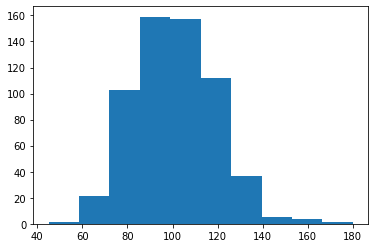

In [30]:
plt.hist(df['time'])
plt.show()

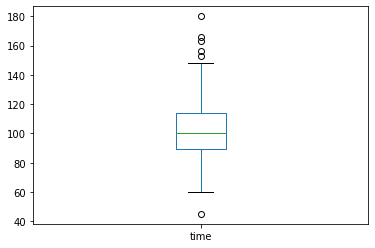

In [31]:
df['time'].plot(kind='box')

In [32]:
(df['time'] <= 70).sum() # 20
(df['time'] >= 130).sum() # 32

32

In [33]:
new_time = []
for i in df['time'] :
    if i >= 130 :
        new_time.append(3)
    elif i > 70 : 
        new_time.append(2)
    else :
        new_time.append(1)

df['new_time'] = pd.DataFrame(new_time)
del df['time']
df

,screening_rat,box_off_num,new_distributor,new_genre,release_year,release_month,release_day,new_time
0,청소년 관람불가,23398,4,2,2012,11,3,2
1,청소년 관람불가,7072501,3,3,2015,11,2,3
2,15세 관람가,6959083,3,2,2013,6,1,2
3,전체 관람가,217866,4,4,2012,7,2,2
4,15세 관람가,483387,2,4,2010,11,1,2
...,...,...,...,...,...,...,...,...
595,청소년 관람불가,1475091,4,7,2014,8,2,2
596,15세 관람가,1716438,3,7,2013,3,2,2
597,청소년 관람불가,2475,3,9,2010,9,3,2
598,15세 관람가,2192525,4,3,2015,5,2,2


### 5 ) screening_rat

In [34]:
tmp = sorted(df['screening_rat'].unique(), reverse=False)

mapping = {}
num = 1
for i in tmp :
    mapping.update({i : num})
    num += 1

make_new_col('screening_rat', mapping)

,box_off_num,new_distributor,new_genre,release_year,release_month,release_day,new_time,new_screening_rat
0,23398,4,2,2012,11,3,2,4
1,7072501,3,3,2015,11,2,3,4
2,6959083,3,2,2013,6,1,2,2
3,217866,4,4,2012,7,2,2,3
4,483387,2,4,2010,11,1,2,2
...,...,...,...,...,...,...,...,...
595,1475091,4,7,2014,8,2,2,4
596,1716438,3,7,2013,3,2,2,2
597,2475,3,9,2010,9,3,2,4
598,2192525,4,3,2015,5,2,2,2


# modeling

## train

In [45]:
train_y = df['box_off_num']
train_x = df.drop(['box_off_num'], axis=1)

In [46]:
train_x

,new_distributor,new_genre,release_year,release_month,release_day,new_time,new_screening_rat
0,4,2,2012,11,3,2,4
1,3,3,2015,11,2,3,4
2,3,2,2013,6,1,2,2
3,4,4,2012,7,2,2,3
4,2,4,2010,11,1,2,2
...,...,...,...,...,...,...,...
595,4,7,2014,8,2,2,4
596,3,7,2013,3,2,2,2
597,3,9,2010,9,3,2,4
598,4,3,2015,5,2,2,2


## test

In [63]:
import pandas as pd
df = pd.read_csv('./data/movies_train.csv')

In [59]:
def make_new_col(column_name, mapper) :
    new = []
    for i in testdf[column_name] :
        if i in mapper.keys() :
            new.append(mapper.get(i))
        else :
            new.append(1)
    df['new_' + str(column_name)] = pd.DataFrame(new)
    del testdf[column_name]
    return testdf

In [60]:
testdf = pd.read_csv('./data/movies_test.csv')

del testdf['title']
del testdf['dir_prev_bfnum']
del testdf['dir_prev_num']
del testdf['num_staff']
del testdf['num_actor']
del testdf['director']

In [61]:
testdf

,distributor,genre,release_time,time,screening_rat
0,시네마서비스,느와르,2010-01-07,125,청소년 관람불가
1,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가
2,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가
3,(주)쇼박스,액션,2010-02-04,116,15세 관람가
4,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가
...,...,...,...,...,...
238,디씨드,드라마,2015-11-19,78,15세 관람가
239,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가
240,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가
241,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가


In [64]:
# 배급사 mapping
tmp = df['distributor'].value_counts()
tmp.value_counts()

mapping = {}
for i in range(len(tmp)):

    if tmp[i] >= 30 :
        mapping.update({ tmp.index[i] : 4 })

    elif tmp[i] >= 10 :
        mapping.update({ tmp.index[i] : 3 })
        
    elif tmp[i] >= 2 :
        mapping.update({ tmp.index[i] : 2 })
        
    else :
        mapping.update({ tmp.index[i] : 1 })
print(mapping)        
make_new_col('distributor',mapping)

{'CJ 엔터테인먼트': 4, '롯데엔터테인먼트': 4, '(주)NEW': 4, '(주)마운틴픽쳐스': 3, '(주)쇼박스': 3, '인디스토리': 3, '골든타이드픽처스': 3, '(주) 케이알씨지': 3, '영화사 진진': 3, '시너지': 3, '(주)키노아이': 3, '어뮤즈': 3, '(주) 영화사조제': 3, '시네마달': 3, '인디플러그': 2, 'KT&G 상상마당': 2, 'NEW': 2, '인벤트 디': 2, '스폰지': 2, '무비꼴라쥬': 2, '시네마 달': 2, '시네마서비스': 2, '필라멘트 픽쳐스': 2, 'BoXoo 엔터테인먼트': 2, '(주)팝엔터테인먼트': 2, 'CGV아트하우스': 2, '리틀빅픽처스': 2, '(주)엣나인필름': 2, '마노엔터테인먼트': 2, '홀리가든': 2, '씨너스엔터테인먼트(주)': 2, '메가박스(주)플러스엠': 2, '나이너스엔터테인먼트(주)': 2, '씨네그루(주)키다리이엔티': 2, '타임스토리그룹': 2, '(주)마인스 엔터테인먼트': 2, '이모션 픽처스': 2, 'CJ E&M 영화부문': 2, '(주) 영화제작전원사': 2, 'KT': 2, '싸이더스': 2, '이십세기폭스코리아(주)': 2, '김기덕 필름': 2, '마운틴 픽처스': 2, '드림팩트 엔터테인먼트': 2, '트리필름': 2, '(주) 브릿지웍스': 2, 'SBS콘텐츠허브': 2, '(주)마인스엔터테인먼트': 2, '(주)프레인글로벌': 2, '리틀빅픽쳐스': 2, '파이오니아21': 2, '조이앤시네마': 2, '화앤담이엔티': 2, '(주) 액티버스엔터테인먼트': 2, '노바엔터테인먼트': 2, '웃기씨네': 2, '(주)스톰픽쳐스코리아': 2, '(주)리틀빅픽처스': 2, 'CGV 아트하우스': 2, 'CJ E&M Pictures': 2, '에스피엠': 2, '드림로드': 2, '서울독립영화제': 2, '백두대간': 2, '쇼박스(주)미디어플렉스': 2, '(주)시네마달': 2, '이달투': 1, 'KBS미디어(

KeyError: 'distributor'

In [ ]:




# 600개의 장르는 총 12개임
genre_all = df['genre'].unique()

mapping = {}
num = 2
for genre in genre_all :
    mapping.update({genre : num})
    num += 1

print(mapping)

make_new_col('genre', mapping)




years, months, days = [], [], []
for line in df['release_time'] :
    a = line.split('-')
    years.append(int(a[0]))
    months.append(int(a[1]))
    days.append(a[2])


new_days = []
for i in range(len(days)) :
    if int(days[i]) >= 20 :
        new_days.append(3)
    elif int(days[i]) >= 10 :
        new_days.append(2)
    else :
        new_days.append(1)
        
df['release_year'] = pd.DataFrame(years)
df['release_month'] = pd.DataFrame(months)
df['release_day'] = pd.DataFrame(new_days)

del df['release_time']







new_time = []
for i in df['time'] :
    if i >= 130 :
        new_time.append(3)
    elif i > 70 : 
        new_time.append(2)
    else :
        new_time.append(1)

df['new_time'] = pd.DataFrame(new_time)
del df['time']
df






tmp = sorted(df['screening_rat'].unique(), reverse=False)

mapping = {}
num = 1
for i in tmp :
    mapping.update({i : num})
    num += 1

make_new_col('screening_rat', mapping)